                                                          Gaussian Mixture Model              

# Gaussian Mixture Model

A Gaussian Mixture Model (GMM) is a probabilistic model that assumes data points are generated from a mixture of several Gaussian (normal) distributions with unknown parameters. Unlike hard clustering methods such as K-Means which assign each point to a single cluster based on the closest centroid, GMM performs soft clustering by assigning each point a probability of belonging to multiple clusters. 

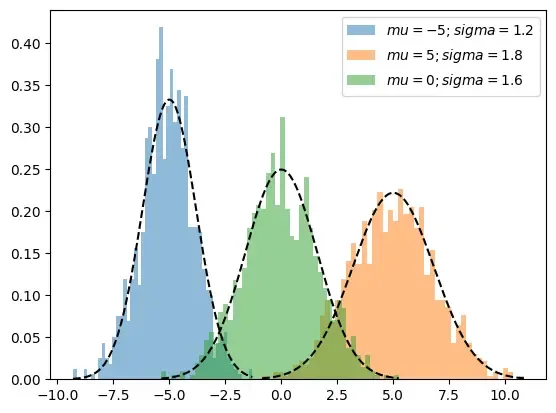

The graph shows a three one-dimensional Gaussian distributions with distinct means and variances. Each curve represents the theoretical probability density function (PDF) of a normal distribution, highlighting differences in location and spread.

## Working of GMM

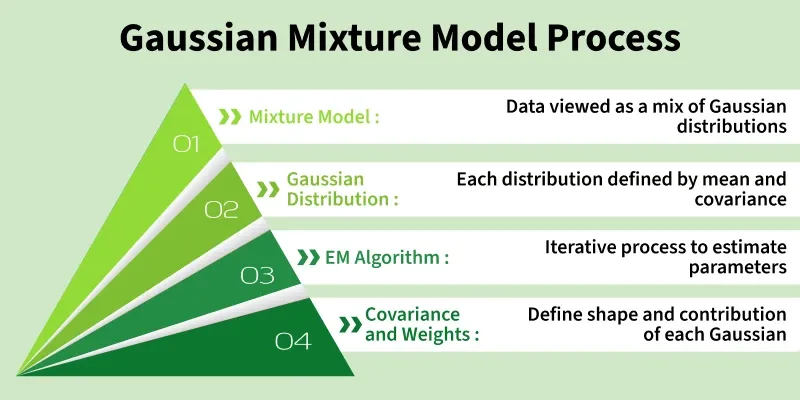

 A Gaussian Mixture Model (GMM) is a probabilistic model that assumes data points are generated from a mixture of several Gaussian (normal) distributions with unknown parameters. Unlike hard clustering methods such as K-Means which assign each point to a single cluster based on the closest centroid, GMM performs soft clustering by assigning each point a probability of belonging to multiple clusters.

 A Gaussian Mixture Model assumes that the data is generated from a mixture of K Gaussian distributions, each representing a cluster. Every Gaussian has its own mean μk , covariance Σk and mixing weight πk.

### 1. Posterior Probability (Cluster Responsibility)

The posterior probability, also known as the cluster responsibility, is calculated for each data point and each cluster. It represents the probability that a given data point belongs to a particular cluster, based on the current parameters of the Gaussian distributions. The formula for calculating the posterior probability is:
$$\gamma_{ik} = \frac{\pi_k \cdot \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \cdot \mathcal{N}(x_i | \mu_j, \Sigma_j)}$$

Where:
- $\gamma_{ik}$ is the posterior probability that data point $x_i$ belongs to cluster $k$.
- $\pi_k$ is the mixing weight for cluster $k$.
- $\mathcal{N}(x_i | \mu_k, \Sigma_k)$ is the probability density function of the Gaussian distribution for cluster $k$ evaluated at data point $x_i$.
- The denominator sums over all clusters to normalize the probabilities.

### 2. Likelihood of a Data Point

The likelihood of a data point under the GMM is calculated by summing the contributions from all clusters, weighted by their mixing coefficients. The formula for the likelihood of a data point $x_i$ is:

$$P(x_i) = \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x_i | \mu_k, \Sigma_k)$$

Where:
- $P(x_i)$ is the likelihood of data point $x_i$ under the GMM.
- $\pi_k$ is the mixing weight for cluster $k$.
- $\mathcal{N}(x_i | \mu_k, \Sigma_k)$ is the probability density function of the Gaussian distribution for cluster $k$ evaluated at data point $x_i$.
- The sum is taken over all clusters to account for the contribution of each cluster to the likelihood of the data point.

### 3. Expectation-Maximization (EM) Algorithm

The Expectation-Maximization (EM) algorithm is an iterative method used to find the maximum likelihood estimates of parameters in a GMM. It consists of two main steps: 
- **Expectation Step (E-step)**: In this step, the algorithm calculates the posterior probabilities (responsibilities) for each data point and each cluster using the current estimates of the parameters. This involves computing how likely it is that each data point belongs to each cluster based on the current Gaussian distributions.
- **Maximization Step (M-step)**: In this step, the algorithm updates the parameters of the Gaussian distributions (means, covariances) and the mixing weights based on the responsibilities calculated in the E-step. The parameters are updated to maximize the likelihood of the data given the current responsibilities.

### 4. Log-Likelihood of the Mixture Model

The log-likelihood of the mixture model is a measure of how well the model fits the data. It is calculated by taking the logarithm of the likelihood of the data under the GMM. The formula for the log-likelihood is:

$$\log L = \sum_{i=1}^{N} \log \left( \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x_i | \mu_k, \Sigma_k) \right)$$

Where:
- $\log L$ is the log-likelihood of the data under the GMM.
- $N$ is the total number of data points.
- $\pi_k$ is the mixing weight for cluster $k$.
- $\mathcal{N}(x_i | \mu_k, \Sigma_k)$ is the probability density function of the Gaussian distribution for cluster $k$ evaluated at data point $x_i$.
- The inner sum accounts for the contribution of all clusters to the likelihood of each data point, and the outer sum aggregates this across all data points to compute the total log-likelihood of the model.

## Cluster Shapes in GMM

In GMM, each cluster is a Gaussian defined by:

* Mean (μ): Center of the cluster.
* Covariance (Σ): Controls the shape, orientation and spread of the cluster.

## Use Cases of GMM
1. **Clustering**: GMM can be used for clustering data points into groups based on their similarity, especially when clusters have different shapes and sizes.
2. **Density Estimation**: GMM can model the underlying probability distribution of the data, which is useful for tasks like anomaly detection and data generation.
3. **Image Segmentation**: GMM can be applied to segment images by modeling the pixel intensity distribution, allowing for the separation of different regions in an image.
4. **Speech Recognition**: GMM is used in speech recognition systems to model the distribution of acoustic features, helping to classify different phonemes or words based on their acoustic properties.

# Advantages of GMM
1. **Flexibility**: GMM can model clusters of various shapes and sizes due to its use of covariance matrices, unlike K-Means which assumes spherical clusters.
2. **Soft Clustering**: GMM provides probabilities of cluster membership, allowing for more nuanced assignments of data points to clusters, which can be beneficial in cases where data points may belong to multiple clusters.
3. **Probabilistic Framework**: GMM is based on a probabilistic framework, which allows for the estimation of the underlying data distribution and can be used for density estimation and anomaly detection.
4. **Handling Overlapping Clusters**: GMM can effectively handle overlapping clusters, as it assigns probabilities to data points rather than making hard assignments, making it suitable for complex datasets where clusters may not be well separated.

## Limitations of GMM  

1. **Sensitivity to Initialization**: GMM can converge to local optima depending on the initial parameter values, which may lead to suboptimal clustering results. Proper initialization techniques or multiple runs may be necessary to achieve better results.
2. **Assumption of Gaussian Distribution**: GMM assumes that the data is generated from a mixture of Gaussian distributions, which may not always be the case. If the underlying data distribution is not Gaussian, GMM may not perform well and could lead to inaccurate clustering results.
3. **Computational Complexity**: GMM can be computationally intensive, especially for large datasets or high-dimensional data, due to the need to estimate parameters for each Gaussian component and compute probabilities for each data point.
4. **Determining the Number of Clusters**: GMM requires the number of clusters (K) to be specified in advance, which can be challenging to determine without prior knowledge of the data. Methods such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC) can be used to help select the appropriate number of clusters, but this adds an additional layer of complexity to the modeling process.    


## Implementing Gaussian Mixture Model (GMM)

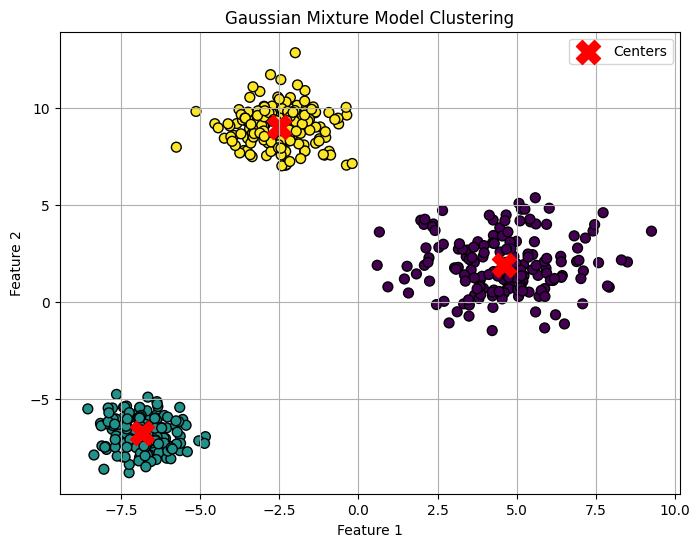

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(
    n_samples=500,
    centers=3,
    random_state=42,
    cluster_std=[1.0, 1.5, 0.8]   # spread for each cluster
)

# Fit the Gaussian Mixture Model

gmm = GaussianMixture(
    n_components=3,        # number of Gaussian components
    covariance_type='full',
    random_state=42
)

gmm.fit(X)               
labels = gmm.predict(X)

# Plot clusters and component centers

plt.figure(figsize=(8, 6))

# scatter points colored by hard labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')

# plot Gaussian centers
plt.scatter(
    gmm.means_[:, 0],
    gmm.means_[:, 1],
    s=300,
    c='red',
    marker='X',
    label='Centers'
)

plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()
plt.show()



## Covariance Types in Gaussian Mixture Models

In GMM covariance matrix plays a important role in shaping the individual Gaussian components of the mixture. Selecting the right covariance type is essential for effectively modeling the structure and relationships within the data. Scikit-Learn offers four types of covariance matrices:

**Full :** Each component has its own full covariance matrix. It allows each component to have a unique shape, orientation and size in all dimensions. Provides the most flexibility but also increases computational cost.
**Tied :** All components share a single common full covariance matrix. Provide all clusters to have the same shape and orientation making it more restrictive. Useful when components are expected to be similar in spread.
**Diagonal :** Each component has its own diagonal covariance matrix and allows each component to have different variances along each dimension but assumes no correlation between dimensions. Computationally efficient and useful for high-dimensional data.
**Spherical :** Each component has a single variance value across all dimensions. Assumes that all clusters are spherical and identical in all directions. The simplest model but often too restrictive for real-world data.

Each covariance type offers different levels of flexibility and constraints that impact how GMM models the data. Choosing the right covariance_type parameter is important.


                                                   Expectation-Maximization Algorithm - ML       

# Expectation-Maximization Algorithm - ML

The Expectation-Maximization (EM) algorithm is a powerful iterative optimization technique used to estimate unknown parameters in probabilistic models, particularly when the data is incomplete, noisy or contains hidden (latent) variables. It works in two steps:

* E-step (Expectation Step): Using the current parameter estimates, the algorithm calculates the expected values of the missing or hidden variables. Essentially, it assigns probabilities or "responsibilities" to different hidden outcomes given the observed data.
* M-step (Maximization Step): With these updated expectations from the E-step, the algorithm then re-estimates the model parameters by maximizing the expected log-likelihood. This improves how well the model explains the observed data.

These two steps are repeated until convergence, which typically means that:

* The parameter values stop changing significantly, or
* The log-likelihood improves only by a negligible amount

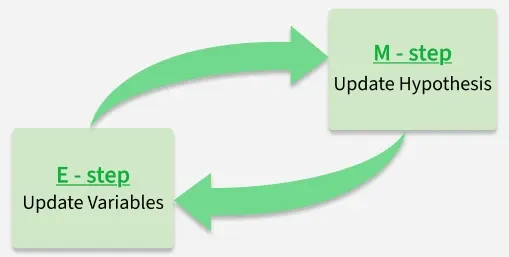

By iteratively repeating these steps the EM algorithm seeks to maximize the likelihood of the observed data.

## Key Terms in Expectation-Maximization (EM) Algorithm

**Latent Variables:** Variables that are not directly observed but are inferred from the data. They represent hidden structure (e.g., cluster assignments in Gaussian Mixture Models).
**Likelihood:** The probability of the observed data given a set of model parameters. EM aims to find parameter values that maximize this likelihood.
**Log-Likelihood:** The natural logarithm of the likelihood function. It simplifies calculations (turning products into sums) and is numerically more stable when dealing with very small probabilities.
**Maximum Likelihood Estimation (MLE):** A statistical approach to estimating parameters by choosing the values that maximize the likelihood of observing the given data. EM extends MLE to cases with hidden or missing variables.
**Posterior Probability:** In Bayesian inference, this represents the probability of parameters (or latent variables) given the observed data and prior knowledge. In EM, posterior probabilities are used in the E-step to estimate the "responsibility" of each hidden variable.
**Convergence:** The stopping criterion for the iterative process. EM is said to converge when updates to parameters or improvements in log-likelihood become negligibly small, meaning the algorithm has reached a stable solution.  

## Working of Expectation-Maximization (EM) Algorithm

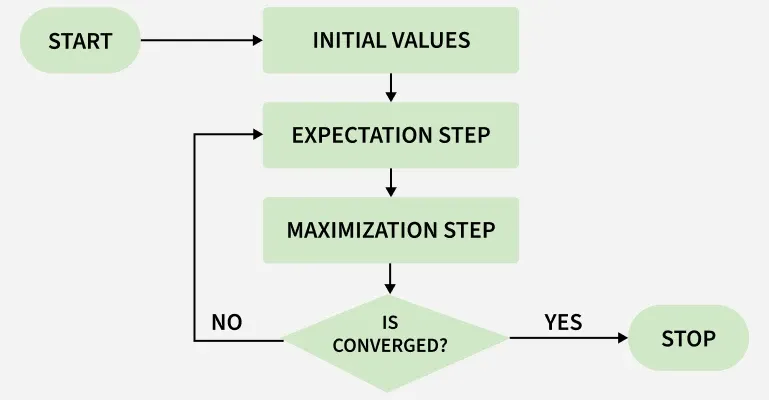



## Dirichlet Process Mixture Models (DPMMs)

Dirichlet Process Mixture Models (DPMMs) is a flexible clustering method that can automatically decide the number of clusters based on the data. Unlike traditional methods like K-means which require you to specify the number of clusters.

It offers a probabilistic and nonparametric approach to clustering which allows the model to figure out number of groups on its own based complexity of the data.

## Concepts in DPMMs

* 1. Beta Distribution

The Beta distribution is a continuous probability distribution defined on the interval [0, 1]. It is parameterized by two positive shape parameters, α (alpha) and β (beta), which control the shape of the distribution. The Beta distribution is often used as a prior distribution in Bayesian statistics, particularly for modeling probabilities and proportions. In the context of DPMMs, the Beta distribution can be used to model the mixing proportions of clusters, allowing for a flexible and adaptive clustering approach that can accommodate an unknown number of clusters.

* 2. Dirichlet Distribution

The Dirichlet distribution is a multivariate generalization of the Beta distribution. It is defined over a simplex, which means it models a vector of probabilities that sum to 1. The Dirichlet distribution is parameterized by a vector of positive shape parameters, often denoted as α (alpha), which control the concentration of the distribution. In DPMMs, the Dirichlet distribution is used as a prior for the mixing proportions of clusters, allowing for an infinite number of potential clusters and enabling the model to adaptively determine the number of clusters based on the data.

## Dirichlet Process (DP)

A Dirichlet Process is a stochastic process that generates probability distributions over infinite categories. It enables clustering without specifying the number of clusters in advance. The Dirichlet Process is defined as:

$$G \sim DP(\alpha, G_0)$$

Where:
- $G$ is a random distribution drawn from the Dirichlet Process.
- $\alpha$ is the concentration parameter that controls how likely it is for new clusters to be created. A higher $\alpha$ encourages more clusters, while a lower $\alpha$ favors fewer clusters.
- $G_0$ is the base distribution, which serves as the prior distribution for the parameters of the clusters. It represents the expected distribution of cluster parameters before observing any data.

## Stick-Breaking Process

The stick-breaking process is a method to generate probabilities from a Dirichlet Process. The concept is shown in the image below:

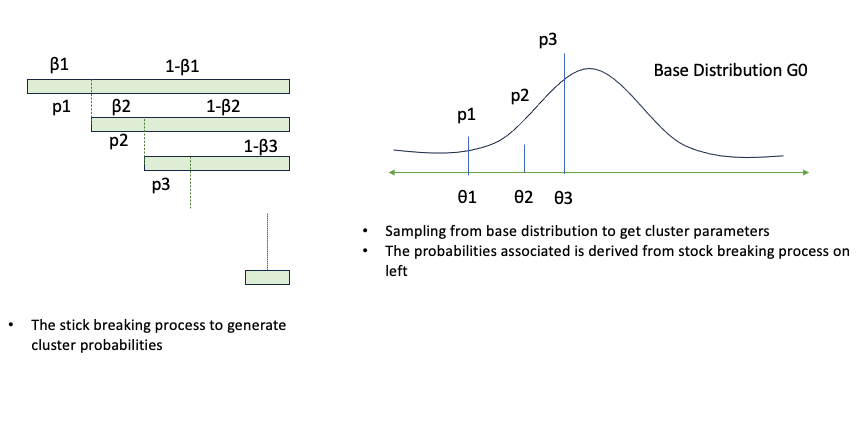

Steps

* Start with a stick of length 1.
* Break the first piece using Beta(1, α) -> this is p1.
* Break the next piece from the remaining stick -> gives p2.
* Keep repeating to get p3, p4 and so on. The pieces will add up close to 1.

## How DPMMs Work?
1. **Initialization**: Start with an empty set of clusters and a concentration parameter α that controls the likelihood of creating new clusters.
2. **Data Assignment**: For each data point, calculate the probability of it belonging to each existing cluster based on the current cluster parameters and the likelihood of the data point under those parameters.
3. **Cluster Creation**: If the data point does not fit well into any existing cluster, it can be assigned to a new cluster with a probability proportional to α.
4. **Parameter Update**: After assigning data points to clusters, update the parameters of each cluster based on the assigned data points, typically using a method like maximum likelihood estimation or Bayesian inference.
5. **Iteration**: Repeat the data assignment and parameter update steps until convergence, where cluster assignments stabilize or the likelihood of the data given the model parameters does not improve significantly.

1* . Initialize: Assign random clusters to data points.
* 2. Iterate for Each Data Point:
Pick one point.
Keep all other assignments fixed.
Compute the probability of placing this point in: an existing cluster or a new cluster.
* 3. Update: Assign the point to whichever option has the higher probability.
* 4. Repeat: Continue until the cluster assignments stop changing.

## Implementing Dirichlet Process Mixture Models using Sklearn

In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from sklearn.decomposition import PCA

data = pd.read_csv('https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/gfg_Mall_Customers-.csv')
print(data.head())




   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:

# Step 2: Feature Selection
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Step 3: Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 4: Fit Bayesian Gaussian Mixture Model
dpmm = BayesianGaussianMixture(
    n_components=10,          
    covariance_type='full',
    weight_concentration_prior_type='dirichlet_process',
    weight_concentration_prior=1e-2,  
    random_state=42
)

dpmm.fit(X)
labels = dpmm.predict(X)


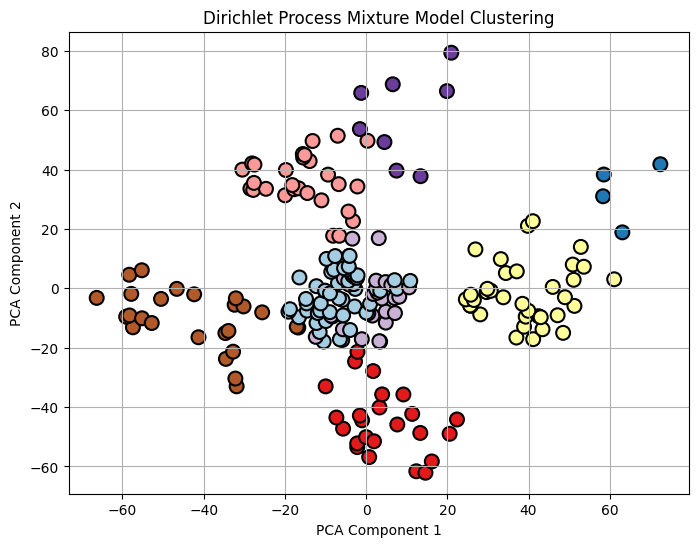

In [8]:
## Step 5: Visualization

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap=plt.cm.Paired, edgecolors='k', s=100, linewidth=1.5)
plt.title('Dirichlet Process Mixture Model Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

## Advantages over Traditional Methods
1. **Automatic Determination of Clusters**: DPMMs can automatically determine the number of clusters based on the data, eliminating the need for pre-specifying the number of clusters as in K-means.
2. **Flexibility**: DPMMs can model complex data distributions and can capture clusters of varying shapes and sizes, unlike K-means which assumes spherical clusters.
3. **Probabilistic Framework**: DPMMs provide a probabilistic framework for clustering, allowing for uncertainty in cluster assignments and enabling the model to capture more nuanced relationships in the data.
4. **Handling Overlapping Clusters**: DPMMs can effectively handle overlapping clusters, as they assign probabilities to data points rather than making hard assignments, making it suitable for complex datasets where clusters may not be well separated. 


                                        Hierarchical Clustering in Machine Learning                                   

## Hierarchical Clustering in Machine Learning

Hierarchical Clustering is an unsupervised learning technique that groups data into a hierarchy of clusters based on similarity. It builds a tree‑like structure (dendrogram) that helps visualize relationships and decide the optimal number of clusters.

* Does not require pre‑selecting the number of clusters.
* Uses agglomerative or divisive approaches.
* Commonly applied in data exploration and pattern discovery.
* It is commonly used in pattern recognition, customer segmentation and image grouping.

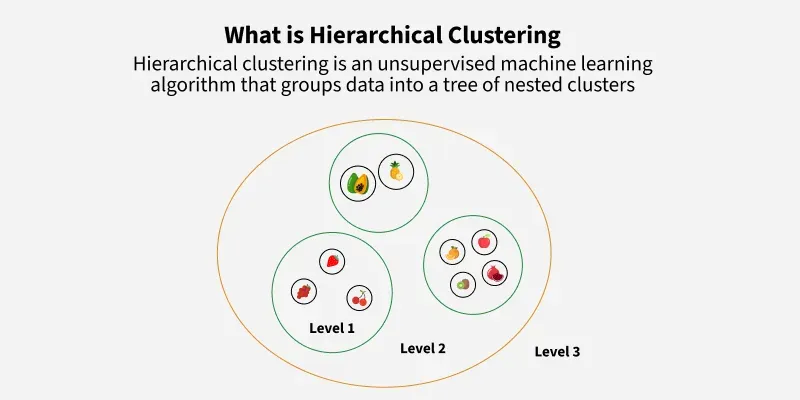

Imagine we have four fruits with different weights: an apple (100g), a banana (120g), a cherry (50g) and a grape (30g). Hierarchical clustering starts by treating each fruit as its own group.

Start with each fruit as its own cluster.
* Merge the closest items: grape (30g) and cherry (50g) are grouped first.
* Next, apple (100g) and banana (120g) are grouped.
* Finally, these two clusters merge into one.
* Finally all the fruits are merged into one large group, showing how hierarchical clustering progressively combines the most similar data points.

## Dendrogram

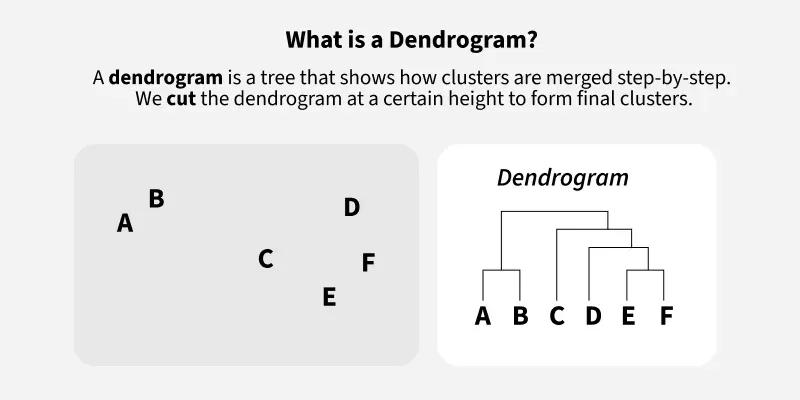

A dendrogram is like a family tree for clusters. It shows how individual data points or groups of data merge together. The bottom shows each data point as its own group and as we move up, similar groups are combined.

The lower the merge point, the more similar the groups are. It helps us see how things are grouped step by step.

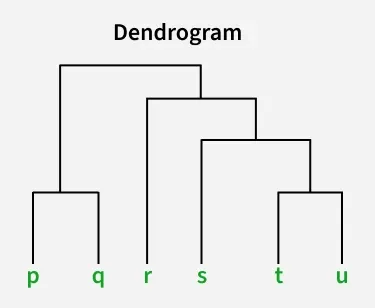

## Types of Hierarchical Clustering

Now we understand the basics of hierarchical clustering. There are two main types of hierarchical clustering.

* **Agglomerative Clustering**
* **Divisive Clustering**

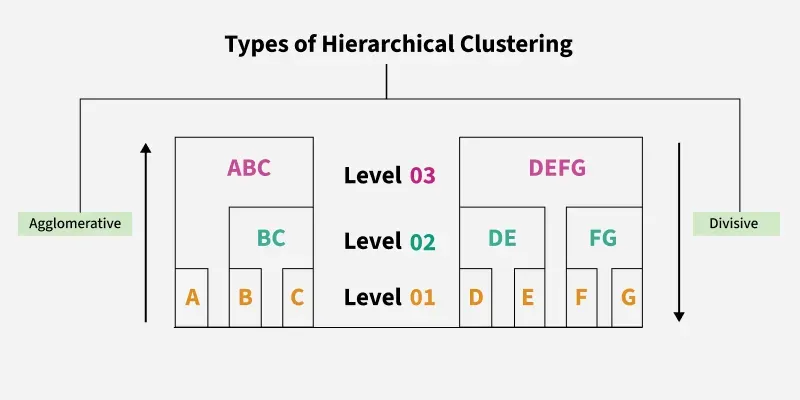

### 1. Hierarchical Agglomerative Clustering

It is also known as the bottom-up approach or hierarchical agglomerative clustering (HAC). Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerate pairs of clusters until all clusters have been merged into a single cluster that contains all data. 

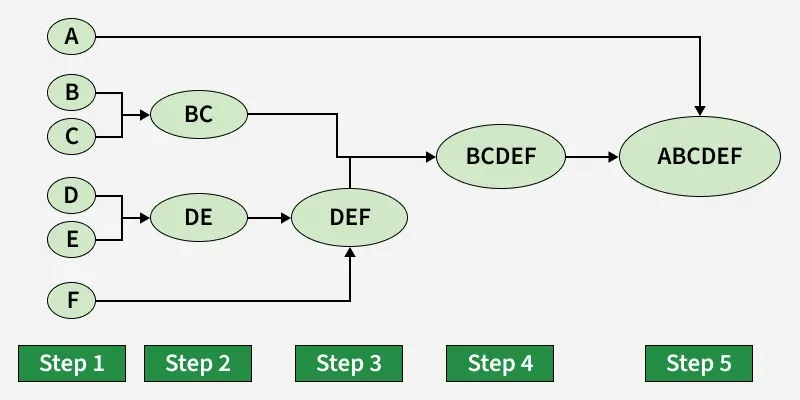

### Workflow for Hierarchical Agglomerative clustering

* **Start with individual points:** Each data point is its own cluster. For example if we have 5 data points we start with 5 clusters each containing just one data point.
* **Calculate distances between clusters:** Calculate the distance between every pair of clusters. Initially since each cluster has one point this is the distance between the two data points.
* **Merge the closest clusters:** Identify the two clusters with the smallest distance and merge them into a single cluster.
* **Update distance matrix:** After merging we now have one less cluster. Recalculate the distances between the new cluster and the remaining clusters.
* **Repeat steps 3 and 4:** Keep merging the closest clusters and updating the distance matrix until we have only one cluster left.
* **Create a dendrogram:** As the process continues we can visualize the merging of clusters using a tree-like diagram called a dendrogram. It shows the hierarchy of how clusters are merged.

## Implementation

* with each data point as its own cluster.
* Compute distances between all clusters.
* Merge the two closest clusters based on a linkage method.
* Update the distances to reflect the new cluster.
* Repeat merging until the desired number of clusters or one cluster remains.
* The dendrogram visualizes these merges as a tree, showing cluster relationships and distances.

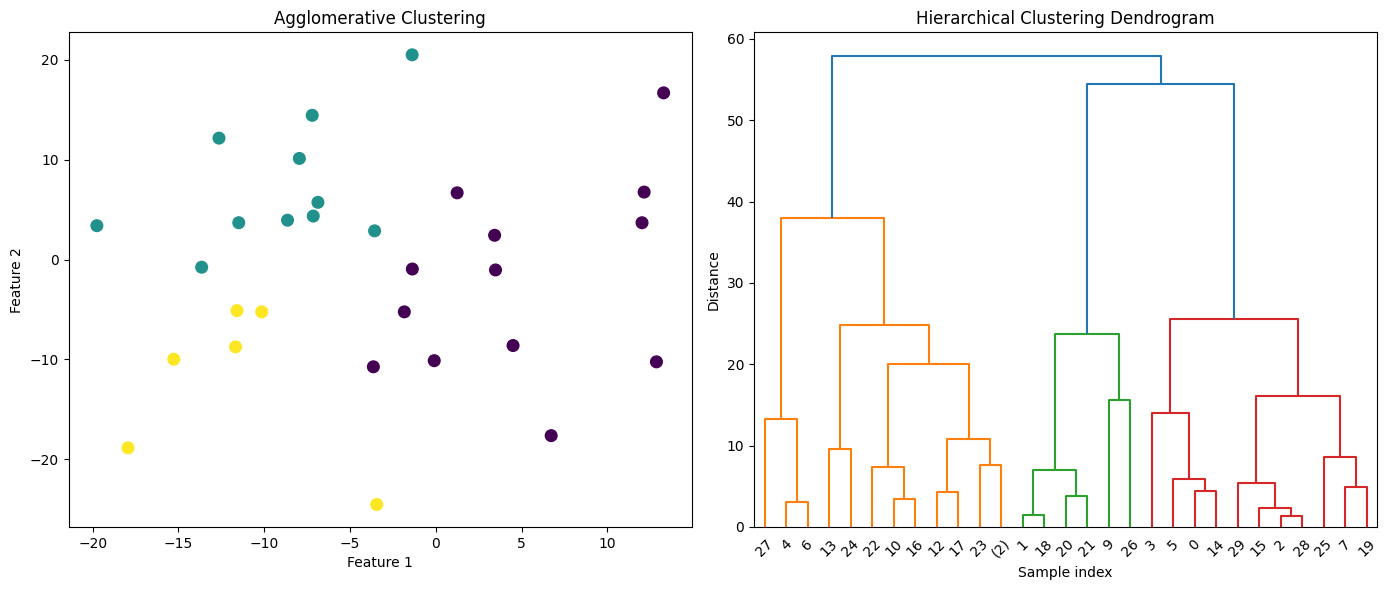

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=30, centers=3, cluster_std=10, random_state=42)

clustering = AgglomerativeClustering(n_clusters=3)
labels = clustering.fit_predict(X)

agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg.fit(X)


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=70)
ax1.set_title("Agglomerative Clustering")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

plt.sca(ax2)
plot_dendrogram(agg, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")

plt.tight_layout()
plt.show()

## 2. Hierarchical Divisive clustering
Divisive clustering is also known as a top-down approach. Top-down clustering requires a method for splitting a cluster that contains the whole data and proceeds by splitting clusters recursively until individual data have been split into singleton clusters.

Workflow for Hierarchical Divisive clustering : 

* Start with all data points in one cluster: Treat the entire dataset as a single large cluster.
* Split the cluster: Divide the cluster into two smaller clusters. The division is typically done by finding the two most dissimilar points in the cluster and using them to separate the data into two parts.
* Repeat the process: For each of the new clusters, repeat the splitting process: Choose the cluster with the most dissimilar points and split it again into two smaller clusters.
* Stop when each data point is in its own cluster: Continue this process until every data point is its own cluster or the stopping condition (such as a predefined number of clusters) is met.

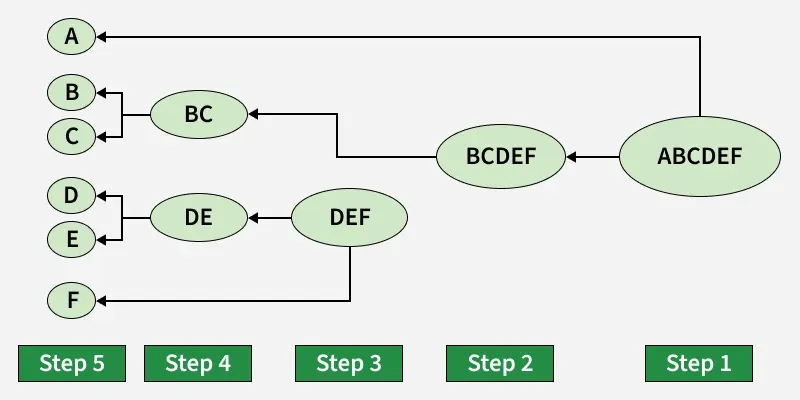

## Implementation

C:\Users\PANDIT JI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PANDIT JI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


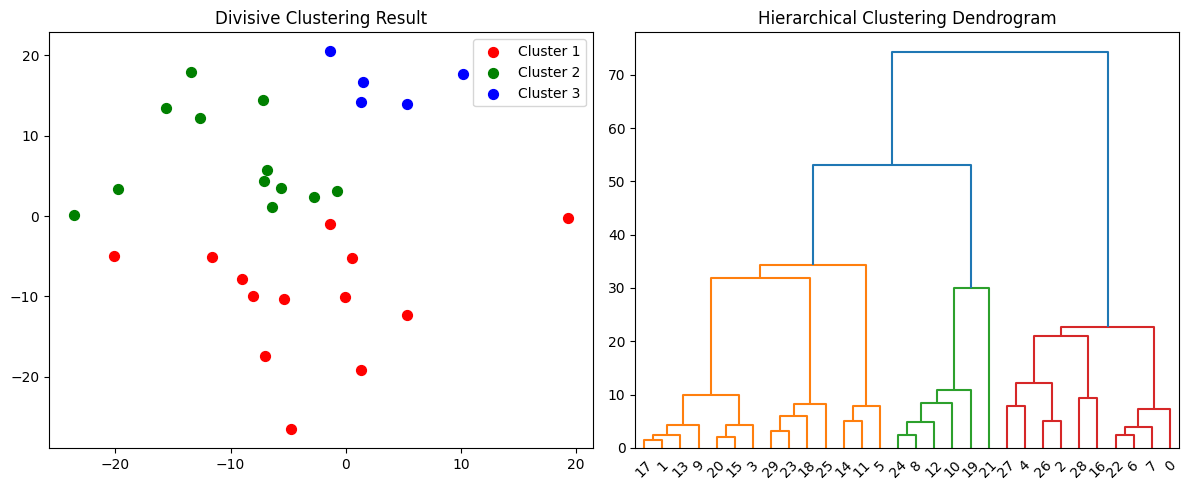

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

X, _ = make_blobs(n_samples=30, centers=5, cluster_std=10, random_state=42)


def divisive_clustering(data, max_clusters=3):
    clusters = [data]  # Initialize with all data in one cluster
    while len(clusters) < max_clusters:
        # Find the index of the largest cluster
        cluster_idx = max(range(len(clusters)), key=lambda i: len(clusters[i]))
        cluster_to_split = clusters.pop(cluster_idx)

        kmeans = KMeans(n_clusters=2, random_state=42).fit(cluster_to_split)
        cluster1 = cluster_to_split[kmeans.labels_ == 0]
        cluster2 = cluster_to_split[kmeans.labels_ == 1]

        clusters.extend([cluster1, cluster2])
    return clusters


clusters = divisive_clustering(X, max_clusters=3)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], s=50,
                c=colors[i], label=f'Cluster {i+1}')
plt.title('Divisive Clustering Result')
plt.legend()

linked = linkage(X, method='ward')

plt.subplot(1, 2, 2)
dendrogram(linked, orientation='top',
           distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')

plt.tight_layout()
plt.show()


## Computing Distance Matrix

While merging two clusters we check the distance between two every pair of clusters and merge the pair with the least distance/most similarity. But the question is how is that distance determined. There are different ways of defining Inter Cluster distance/similarity. Some of them are:

* Min Distance: Find the minimum distance between any two points of the cluster.
* Max Distance: Find the maximum distance between any two points of the cluster.
* Group Average: Find the average distance between every two points of the clusters.
* Ward's Method: The similarity of two clusters is based on the increase in squared error when two clusters are merged.

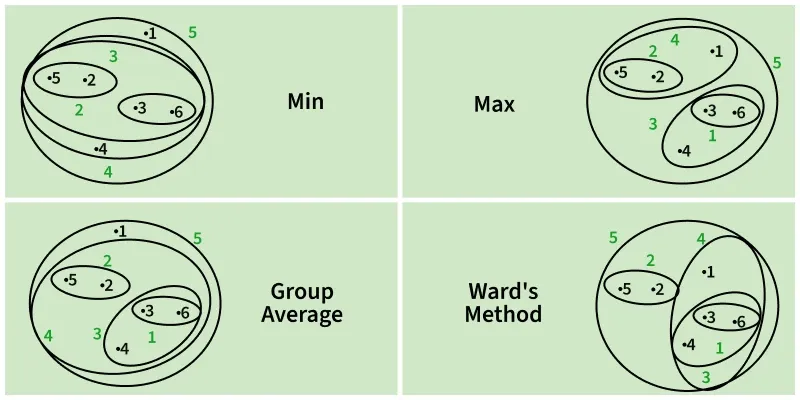



                                                           Affinity Propagation        

# Affinity Propagation


Affinity Propagation (AP) is a clustering algorithm that automatically identifies clusters and their exemplars (representative points) without requiring you to specify the number of clusters in advance. Unlike methods such as K-Means, Affinity Propagation determines cluster centers by iteratively exchanging “messages” between data points to identify the most suitable exemplars.

Suppose a dataset of fruits with features like color, size and weight. Affinity Propagation can group similar fruits:

* Apples with apples
* Bananas with bananas

**Note: The algorithm does not require prior labels, it clusters purely based on similarity.**

## Working of Affinity Propagation

### 1. Similarity Computation

Affinity Propagation starts by computing a similarity matrix that quantifies how similar each pair of data points is. This is often done using a negative squared Euclidean distance, where higher values indicate greater similarity.

$$s(i, j) = -\|x_i - x_j\|^2$$

Where:
- $s(i, j)$ is the similarity between data points $i$ and $j$.
- $x_i$ and $x_j$ are the feature vectors of data points $i$ and $j$ respectively.
- $\|x_i - x_j\|^2$ is the squared Euclidean distance between the two data points.


### 2. Responsibility Update

In this step, each data point sends a message to every other data point indicating how well-suited it thinks the other point is to be its exemplar (cluster center). This message is called the responsibility and is denoted as $r(i, k)$, where $i$ is the data point sending the message and $k$ is the potential exemplar. The responsibility is updated based on the similarity and the current availability of the potential exemplar.
$$r(i, k) = s(i, k) - \max_{k' \neq k} \{a(i, k') + s(i, k')\}$$

Where:
- $r(i, k)$ is the responsibility of data point $i$ for potential exemplar $k$.
- $s(i, k)$ is the similarity between data point $i$ and potential exemplar $k$.
- $a(i, k')$ is the availability of potential exemplar $k'$ for data point $i$.
- The max term considers the best alternative exemplar for data point $i$ other than $k$.

### 3. Availability Update

After the responsibility messages are updated, each data point sends an availability message to every other data point indicating how appropriate it thinks it is for the other point to choose it as an exemplar. This message is called the availability and is denoted as $a(i, k)$, where $i$ is the data point sending the message and $k$ is the potential exemplar. The availability is updated based on the responsibilities received from other data points.
$$a(i, k) = \min\{0, r(k, k) + \sum_{i' \notin \{i, k\}} \max\{0, r(i', k)\}\}$$

### 4. Iterative Updates and Convergence

The responsibility and availability messages are updated iteratively until convergence, which typically occurs when the messages stabilize and do not change significantly between iterations. The algorithm identifies exemplars based on the final responsibility and availability values, where a data point is considered an exemplar if it has a high responsibility for itself and a high availability from other data points.

## Visualizing the Process

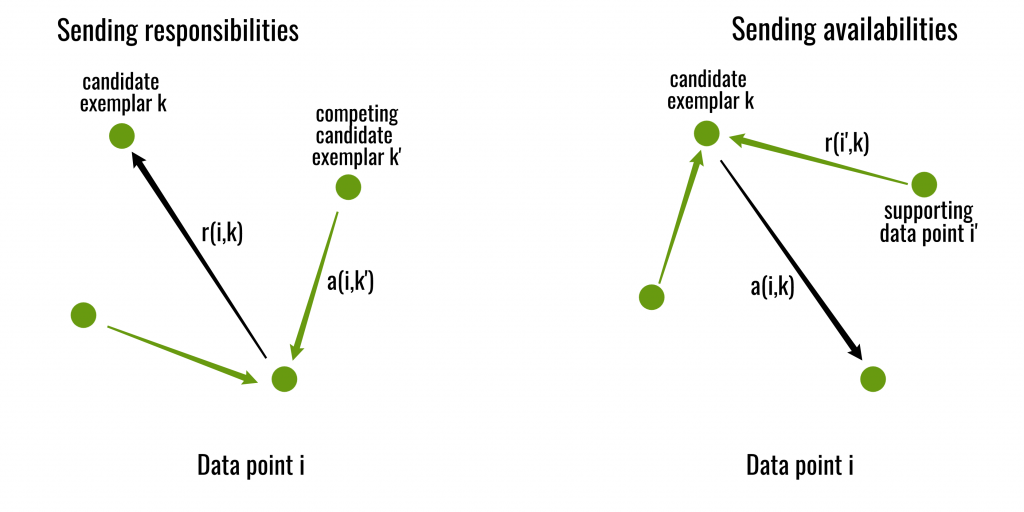

## Key Parameters Influencing Clustering

### 1. Preference

* Controls the number of exemplars (cluster centers).
* Higher preference → more exemplars → more clusters.
* Lower preference → fewer exemplars → fewer clusters.
* Choosing the right preference is important to balance under and over-clustering.

### 2. Damping Factor

* Helps stabilize the algorithm by limiting the update size between iterations.
* Without damping, the algorithm may oscillate or fail to converge.
* Typical values are between 0.5 and 1.0, with higher values slowing convergence but increasing stability.

## Implementing Affinity Propagation

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from itertools import cycle

# Dataset loading and Pre-Processing
dataset = "https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/gfg_Mall_Customers-.csv"

data = pd.read_csv(dataset).dropna().drop('CustomerID', axis=1)



In [9]:
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [10]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

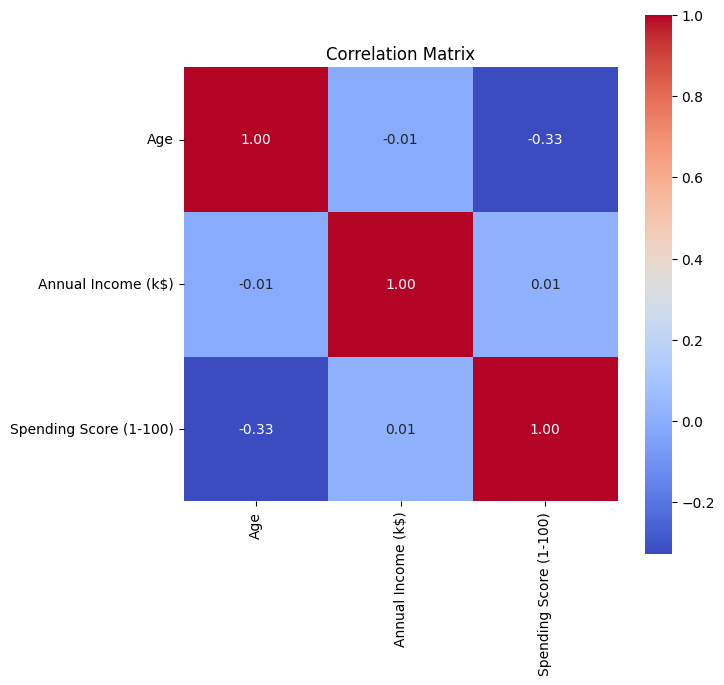

In [11]:
# EDA
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",square=True)
plt.title("Correlation Matrix")
plt.show()

* preference: Controls how likely a point is to become an exemplar and affects the number of clusters.
* max_iter: Maximum number of iterations allowed.
* convergence_iter: Number of stable iterations needed before the algorithm stops.
* random_state: Ensures consistent results across runs.
* damping: Slows updates to avoid oscillation; a value like 0.9 increases stability but slows convergence.

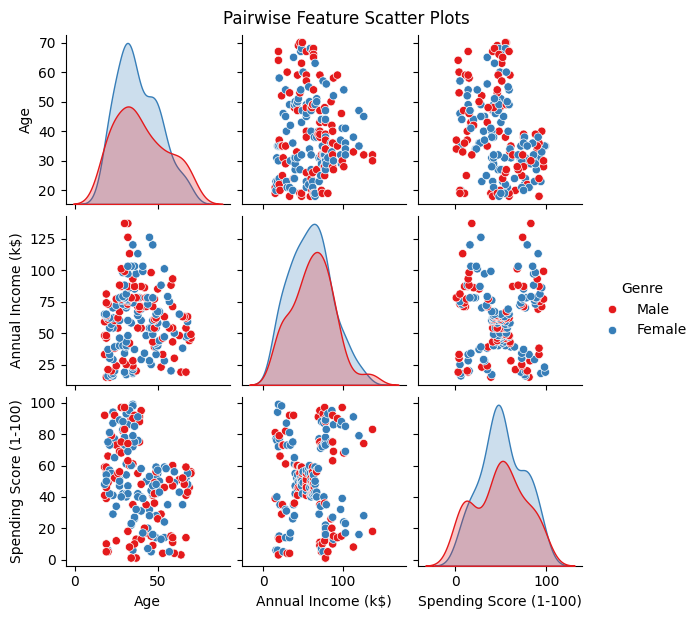

C:\Users\PANDIT JI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\PANDIT JI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\PANDIT JI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


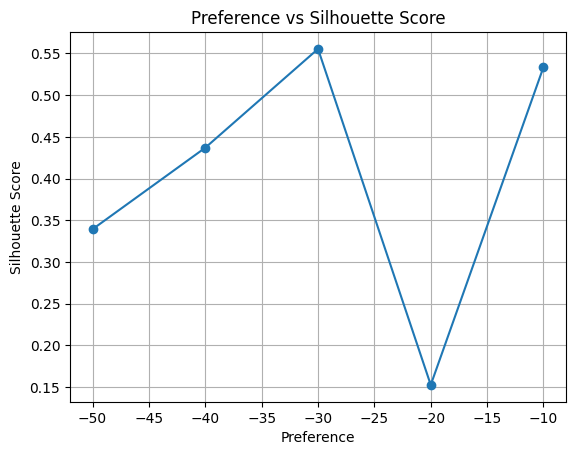

In [12]:
# Pairwise Feature Scatter Plots

sns.pairplot(data, palette="Set1", hue="Genre", diag_kind="kde", height=2)
plt.suptitle("Pairwise Feature Scatter Plots", y=1.02)
plt.show()

# Affinity Propagation Clustering and Performance Evaluation

Preference = [-50, -40, -30, -20, -10]
silhouette_scores = []

for preference in Preference:
    model = AffinityPropagation(preference=preference, random_state=42)
    model.fit(X_std)
    
    # Evaluate only if more than one cluster is found
    if len(np.unique(model.labels_)) > 1:
        score = metrics.silhouette_score(X_std, model.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(np.nan)

plt.plot(Preference, silhouette_scores, marker='o')
plt.title('Preference vs Silhouette Score')
plt.xlabel('Preference')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [13]:
# Applying Affinity Propagation Clustering

af = AffinityPropagation(preference=-30, max_iter=50, damping=0.7,
                         random_state=42, convergence_iter=20).fit(X_std)

cluster_labels = af.labels_
print("Cluster labels:", cluster_labels)

Cluster labels: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]


In [14]:
# Evaluating its Performance

silhouette_score = metrics.silhouette_score(X_std, cluster_labels)
print(f"Silhouette Score: {silhouette_score:.4f}")

Silhouette Score: 0.5530


<>:20: SyntaxWarning: invalid escape sequence '\$'
<>:20: SyntaxWarning: invalid escape sequence '\$'
C:\Users\PANDIT JI\AppData\Local\Temp\ipykernel_16968\3354966105.py:20: SyntaxWarning: invalid escape sequence '\$'
  plt.xlabel('Annual Income (k\$)')
C:\Users\PANDIT JI\AppData\Local\Temp\ipykernel_16968\3354966105.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(cluster_center[0], cluster_center[1], 'o',
C:\Users\PANDIT JI\AppData\Local\Temp\ipykernel_16968\3354966105.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.3)


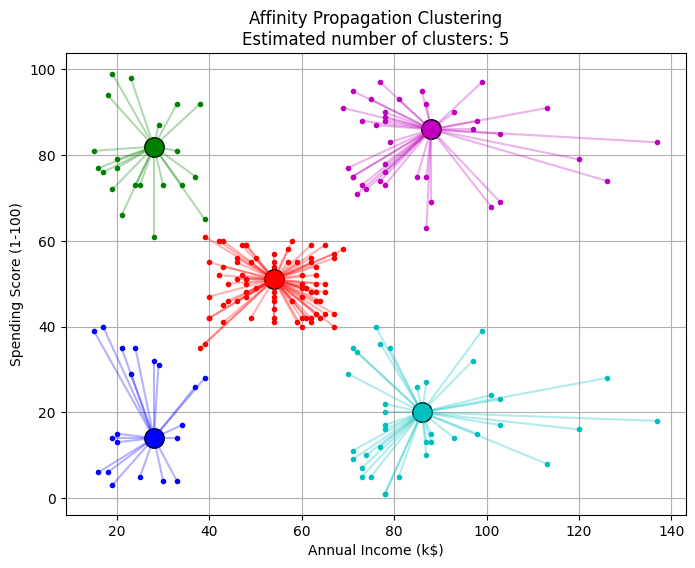

In [15]:
plt.figure(figsize=(8, 6))
colors = cycle('bgrcmyk')

n_clusters_ = len(af.cluster_centers_indices_)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X.iloc[cluster_centers_indices[k]]

    plt.plot(X.iloc[class_members, 0], X.iloc[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor=col, markeredgecolor='k', markersize=14)

    for x in X.iloc[class_members].values:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.3)

plt.title(f'Affinity Propagation Clustering\nEstimated number of clusters: {n_clusters_}')
plt.xlabel('Annual Income (k\$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

## Benifit of Affinity Propagation
1. **Automatic Cluster Determination**: Affinity Propagation does not require the number of clusters to be specified in advance, making it more flexible than methods like K-Means.
2. **Identifies Exemplars**: The algorithm identifies exemplars (representative data points) for each cluster, which can provide insights into the structure of the data and help interpret the clusters.
3. **Works with Non-Spherical Clusters**: Affinity Propagation can effectively cluster data that does not conform to spherical shapes, as it relies on similarity measures rather than distance to a centroid, making it suitable for a wider range of clustering problems.

## Application of Affinity Propagation
1. **Customer Segmentation**: Affinity Propagation can be used to segment customers based on purchasing behavior, demographics, or preferences, allowing businesses to tailor marketing strategies and improve customer engagement.
2. **Image Clustering**: In computer vision, Affinity Propagation can cluster images based on visual features, enabling applications such as image retrieval, organization, and object recognition.
3. **Document Clustering**: Affinity Propagation can group similar documents together based on their content, which is useful for tasks like topic modeling, information retrieval, and natural language processing.